# Hypothesis Testing

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

## Loading Data

In [2]:
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'akas_cleaned.csv.gz',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'ratings_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json']

In [3]:
 file_list[2]

'combined_tmdb_data.csv.gz'

In [4]:
## add the folder plus filename
FOLDER + file_list[2]

'Data/combined_tmdb_data.csv.gz'

In [5]:
## try read csv with folder plus filename
pd.read_csv(FOLDER + file_list[2])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.000,3.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2344.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,tt9369276,0.0,/9p6AZXWspY9HHAkyeohidZexlrJ.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,104007.0,ja,くの一五人衆VS女ドラゴン集団,...,0.0,72.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Amazons Dragon Woman vs. Kunoichi,0.0,6.500,2.0,NaN
14998,tt9372136,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",https://www.truevisiontv.com/films/dying-for-d...,826567.0,en,Dying for Drugs,...,0.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A POWERFUL INTERNATIONAL INVESTIGATION OF THE ...,Dying for Drugs,0.0,0.000,0.0,NaN
14999,tt9383042,0.0,/iY2GabFOyojUy07PVqu2iJwcHjb.jpg,"{'id': 53721, 'name': 'Cine Gibi Collection', ...",0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,238184.0,pt,Cine Gibi 2,...,0.0,64.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Cine Gibi 2,0.0,7.283,23.0,NaN
15000,tt9815072,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,249087.0,en,Pontianak Menjerit,...,0.0,105.0,[],Released,NaN,Pontianak Menjerit,0.0,5.000,1.0,NaN


In [6]:
import glob
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

Data/*.csv.gz


In [7]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['Data/title_basics_cleaned.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/ratings_cleaned.csv.gz',
 'Data/akas_cleaned.csv.gz',
 'Data/combined_tmdb_data.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz']

In [8]:
# Use glob.glob to get COMPLETE filepaths and sort
q = FOLDER+"final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/final_*.csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz']

In [9]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive = True))
file_list

Data//**/final_*.csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz']

In [10]:
# ## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.00,3.0,NaN


In [11]:
df = df.loc[df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.000,3.0,NaN
5,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2344.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,tt9369276,0.0,/9p6AZXWspY9HHAkyeohidZexlrJ.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,104007.0,ja,くの一五人衆VS女ドラゴン集団,...,0.0,72.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Amazons Dragon Woman vs. Kunoichi,0.0,6.500,2.0,NaN
3132,tt9372136,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",https://www.truevisiontv.com/films/dying-for-d...,826567.0,en,Dying for Drugs,...,0.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A POWERFUL INTERNATIONAL INVESTIGATION OF THE ...,Dying for Drugs,0.0,0.000,0.0,NaN
3133,tt9383042,0.0,/iY2GabFOyojUy07PVqu2iJwcHjb.jpg,"{'id': 53721, 'name': 'Cine Gibi Collection', ...",0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,238184.0,pt,Cine Gibi 2,...,0.0,64.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Cine Gibi 2,0.0,7.283,23.0,NaN
3134,tt9815072,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,249087.0,en,Pontianak Menjerit,...,0.0,105.0,[],Released,NaN,Pontianak Menjerit,0.0,5.000,1.0,NaN


In [12]:
# reset index
df = df.reset_index(drop = True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.000,3.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2344.0,PG


In [13]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz', compression = 'gzip', index = False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz', lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.000,3.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2344.0,PG


In [14]:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                15002 non-null  object 
 1   adult                  15002 non-null  float64
 2   backdrop_path          6444 non-null   object 
 3   belongs_to_collection  787 non-null    object 
 4   budget                 15002 non-null  float64
 5   genres                 15002 non-null  object 
 6   homepage               1375 non-null   object 
 7   id                     15002 non-null  float64
 8   original_language      15002 non-null  object 
 9   original_title         15002 non-null  object 
 10  overview               13921 non-null  object 
 11  popularity             15002 non-null  float64
 12  poster_path            12628 non-null  object 
 13  production_companies   15002 non-null  object 
 14  production_countries   15002 non-null  object 
 15  re

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.000,3.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2344.0,PG


# 1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

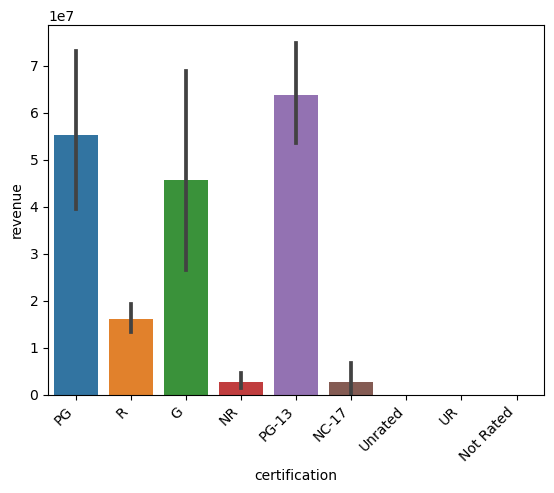

In [15]:
 ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [16]:
df['revenue'].describe()

count    1.500200e+04
mean     5.591874e+06
std      3.998273e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.118889e+09
Name: revenue, dtype: float64

In [17]:
df['certification'].describe()

count     2490
unique       9
top          R
freq      1187
Name: certification, dtype: object

In [18]:
df['certification'].value_counts()

R            1187
PG-13         572
NR            382
PG            247
G              76
NC-17          23
Unrated         1
UR              1
Not Rated       1
Name: certification, dtype: int64

In [24]:
df_cols = df[['certification', 'revenue']]
df_cols

,certification,revenue
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,PG,14204632.0
...,...,...
14997,NaN,0.0
14998,NaN,0.0
14999,NaN,0.0
15000,NaN,0.0


In [31]:
group_g = df_cols[df_cols['certification'] == 'G']['revenue']
group_pg = df_cols[df_cols['certification'] == 'PG']['revenue']
group_pg13 = df_cols[df_cols['certification'] == 'PG-13']['revenue']
group_r = df_cols[df_cols['certification'] == 'R']['revenue']

In [32]:
#Checking for abs value of z-score that are > 3
is_outlier_group_g = np.abs(stats.zscore(group_g)) > 3
print(f'There are {is_outlier_group_g.sum()} outliers in rated g out of {len(group_g)})')

There are 1 outliers in rated g 76)


In [33]:
is_outlier_group_pg = np.abs(stats.zscore(group_pg)) > 3
print(f'There are {is_outlier_group_pg.sum()} outliers in rated pg out of{len(is_outlier_group_pg)})')

There are 7 outliers in rated pg 247)


In [34]:
is_outlier_group_pg13 = np.abs(stats.zscore(group_pg13)) > 3
print(f'There are {is_outlier_group_pg13.sum()} outliers in rated pg13 out of {len(is_outlier_group_pg13)})')

There are 14 outliers in rated pg13 572)


In [35]:
is_outlier_group_r = np.abs(stats.zscore(group_r)) > 3
print(f'There are {is_outlier_group_r.sum()} outliers in rated r out of {len(is_outlier_group_r)})')


There are 23 outliers in rated r 1187)


In [36]:
group_g = group_g.loc[~is_outlier_group_g]
group_g

18       224834564.0
25       169327687.0
29               0.0
328       27965865.0
480       19748009.0
            ...     
14650            0.0
14661            0.0
14814            0.0
14862            0.0
14985            0.0
Name: revenue, Length: 75, dtype: float64

In [38]:
group_pg = group_pg.loc[~is_outlier_group_pg]
group_pg

4         14204632.0
24        36754634.0
27        36609995.0
32       354248063.0
33        35134820.0
            ...     
14341            0.0
14429            0.0
14474            0.0
14700            0.0
14765            0.0
Name: revenue, Length: 240, dtype: float64

In [39]:
group_pg13= group_pg13.loc[~is_outlier_group_pg13]
group_pg13

23       296339527.0
40        14828081.0
46               0.0
47               0.0
52       127666415.0
            ...     
13890        75000.0
13911            0.0
14269            0.0
14511     10494545.0
14565            0.0
Name: revenue, Length: 558, dtype: float64

In [40]:
group_r = group_r.loc[~is_outlier_group_r]
group_r

5             0.0
6             0.0
7             0.0
15        14904.0
21       105983.0
           ...   
14274         0.0
14296         0.0
14392         0.0
14509         0.0
14763         0.0
Name: revenue, Length: 1164, dtype: float64

In [41]:
result = stats.levene(group_g,group_pg,group_pg13,group_r)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=72.00995813464128, pvalue=2.9371268982197533e-44)
True


In [43]:
from scipy.stats import f_oneway

#ANOVA test
f_statistic, p_value = f_oneway(group_g, group_pg, group_pg13, group_r)

if p_value < 0.05:  
    print("There is a significant difference in revenue between MPAA ratings.")
else:
    print("There is no significant difference in revenue between MPAA ratings.")

There is a significant difference in revenue between MPAA ratings.


# 2.  Does the genre action generate a higher revenue than others?

In [87]:
df['has_action'] = df['genres'].str.contains('Action')
df['has_action'].value_counts()

False    13500
True      1502
Name: has_action, dtype: int64

In [89]:
needed_cols = ['has_action','revenue']

df[needed_cols]

,has_action,revenue
0,False,0.0
1,False,0.0
2,True,0.0
3,False,0.0
4,False,14204632.0
...,...,...
14997,False,0.0
14998,False,0.0
14999,False,0.0
15000,False,0.0


In [90]:
noaction_df = df.loc[ df['has_action']==False, needed_cols]
noaction_df

,has_action,revenue
0,False,0.0
1,False,0.0
3,False,0.0
4,False,14204632.0
5,False,0.0
...,...,...
14997,False,0.0
14998,False,0.0
14999,False,0.0
15000,False,0.0


In [91]:
action_df = df.loc[ df['has_action']==True, needed_cols]
action_df

,has_action,revenue
2,True,0.0
6,True,0.0
22,True,546388105.0
23,True,296339527.0
24,True,36754634.0
...,...,...
14871,True,0.0
14900,True,0.0
14907,True,0.0
14921,True,0.0


In [92]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([noaction_df,action_df])
plot_df

,has_action,revenue
0,False,0.0
1,False,0.0
3,False,0.0
4,False,14204632.0
5,False,0.0
...,...,...
14871,True,0.0
14900,True,0.0
14907,True,0.0
14921,True,0.0


In [94]:
noaction_group = noaction_df['revenue']
action_group = action_df['revenue']
noaction_group

0               0.0
1               0.0
3               0.0
4        14204632.0
5               0.0
            ...    
14997           0.0
14998           0.0
14999           0.0
15000           0.0
15001           0.0
Name: revenue, Length: 13500, dtype: float64

In [95]:
noaction_outliers = np.abs(stats.zscore(noaction_group)) > 3
noaction_outliers.sum()

157

In [96]:
action_outliers = np.abs(stats.zscore(action_group)) > 3
action_outliers.sum()

33

In [97]:
noaction_group = noaction_group.loc[~noaction_outliers]
noaction_group

0               0.0
1               0.0
3               0.0
4        14204632.0
5               0.0
            ...    
14997           0.0
14998           0.0
14999           0.0
15000           0.0
15001           0.0
Name: revenue, Length: 13343, dtype: float64

In [98]:
action_group = action_group.loc[~action_outliers]
action_group

2               0.0
6               0.0
24       36754634.0
34              0.0
35              0.0
            ...    
14871           0.0
14900           0.0
14907           0.0
14921           0.0
14948           0.0
Name: revenue, Length: 1469, dtype: float64

In [99]:
result = stats.levene(action_group,noaction_group)
print(result)

LeveneResult(statistic=594.6527855761491, pvalue=8.32545173299332e-129)


In [100]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [103]:
result = stats.ttest_ind(action_group, noaction_group, equal_var=False)
print(result)
result.pvalue  < .05

if p_value < 0.05:  
    print("There is a significant difference in revenue from action movies.")
else:
    print("There is no significant difference in revenue from action movies.")

Ttest_indResult(statistic=9.84593107187294, pvalue=3.3542663910669873e-22)
There is a significant difference in revenue from action movies.


# 3. Are horror movies among the most popular among viewers?

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                15002 non-null  object 
 1   adult                  15002 non-null  float64
 2   backdrop_path          6444 non-null   object 
 3   belongs_to_collection  787 non-null    object 
 4   budget                 15002 non-null  float64
 5   genres                 15002 non-null  object 
 6   homepage               1375 non-null   object 
 7   id                     15002 non-null  float64
 8   original_language      15002 non-null  object 
 9   original_title         15002 non-null  object 
 10  overview               13921 non-null  object 
 11  popularity             15002 non-null  float64
 12  poster_path            12628 non-null  object 
 13  production_companies   15002 non-null  object 
 14  production_countries   15002 non-null  object 
 15  re

In [117]:
df['has_horror'] = df['genres'].str.contains('Horror')
df['has_horror'].value_counts()

False    14007
True       995
Name: has_horror, dtype: int64

In [129]:
needed_cols2 = ['has_horror','popularity']
df[needed_cols2]

,has_horror,popularity
0,False,2.798
1,False,2.212
2,False,1.400
3,False,2.208
4,False,30.103
...,...,...
14997,False,2.554
14998,False,1.133
14999,False,1.533
15000,True,1.400


In [119]:
horror_df = df.loc[ df['has_horror']==True, needed_cols1]
horror_df

,has_action,revenue
15,False,14904.0
31,False,0.0
35,True,0.0
37,False,161834276.0
40,False,14828081.0
...,...,...
14960,False,0.0
14975,False,0.0
14979,False,0.0
14987,False,0.0


In [132]:
nohorror_df = df.loc[ df['has_horror']==False, needed_cols2]
nohorror_df

,has_horror,popularity
0,False,2.798
1,False,2.212
2,False,1.400
3,False,2.208
4,False,30.103
...,...,...
14996,False,3.258
14997,False,2.554
14998,False,1.133
14999,False,1.533
